<a href="https://colab.research.google.com/github/kusalsai/Ayinala_INFO5731_Spring2025/blob/main/Ayinala_KusalSai_Assignment_5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 5**

---


**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100

**Full Points will be given those who present well**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

# **SENTIMENT ANALYSIS**

The objective of this assignment is to give you **hands-on experience** in applying various** sentiment analysis techniques** on real-world textual data. You are expected to explore data, apply machine learning models, and evaluate their performance

**1. Dataset Collection & Preparation**

Find a real-world dataset with text and positive, negative, and neutral sentiment labels.

Justify your dataset choice and handle **class imbalance** if needed.

**2. Exploratory Data Analysis (EDA)**

Clean and preprocess the data (tokenization, stopwords, lemmatization).

Perform EDA: class distribution, word clouds, n-gram analysis, sentence lengths, etc.

Visualize insights using relevant plots and charts.

**3. Sentiment Classification**

Apply at least three traditional ML models (e.g., SVM, Naive Bayes, XGBoost) using TF-IDF or embeddings.

If applicable, compare with a pretrained model (RoBERTa/BERT).

Tune hyperparameters and use cross-validation.

**4. Evaluation & Reporting**

Evaluate with metrics: Accuracy, Precision, Recall, F1, Confusion Matrix.

Summarize results, compare models, and reflect on what worked.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
dataset = pd.read_csv('/content/assignment5_dataset.csv')
dataset.head()

,document_id,tweetText,sentiment
0,1,image fx competitive fencing tournament ai aia...,negative
1,2,responsible orgs marketing practice true compe...,negative
2,3,connected intelligence boomi lock apis generat...,neutral
3,4,fascinated fusion art technology explore new g...,positive
4,5,microsoft tout muse new generative ai model vi...,negative


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


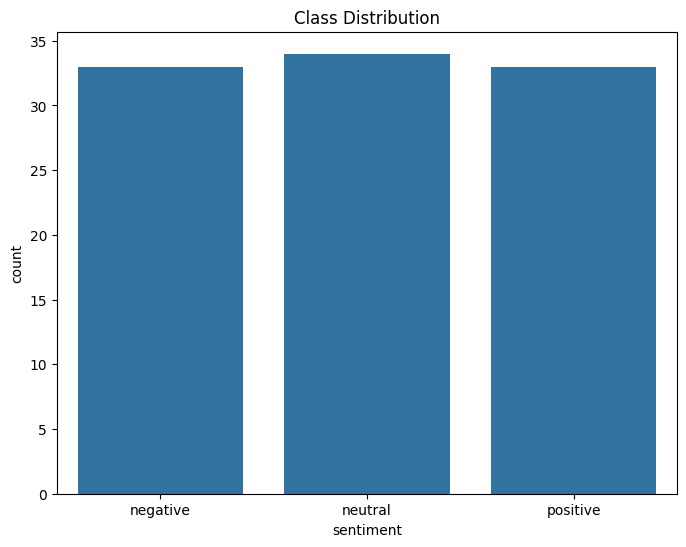

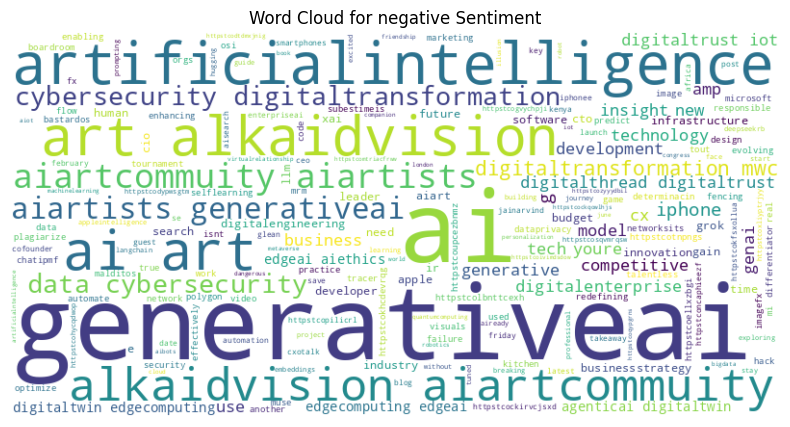

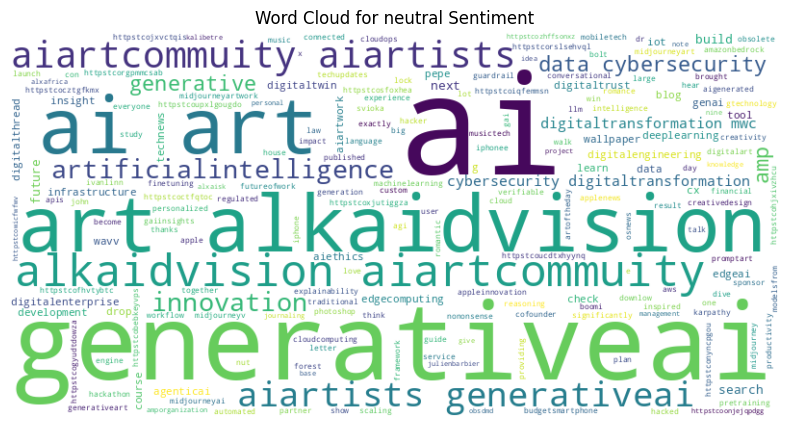

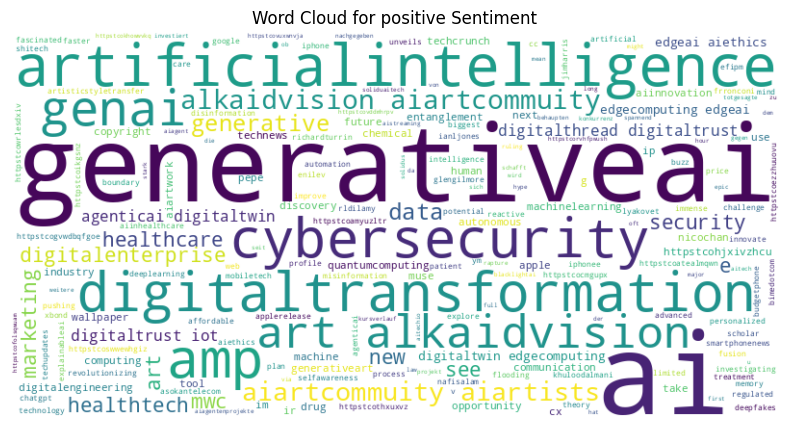

                                  bigram  count
21                                ai art     23
70               aiartcommuity aiartists     23
71                aiartists generativeai     23
134                     art alkaidvision     23
99            alkaidvision aiartcommuity     23
44                       ai generativeai     14
147  artificialintelligence generativeai     12
450                    generativeai data     12
332            digitaltransformation mwc     12
291                   data cybersecurity     12


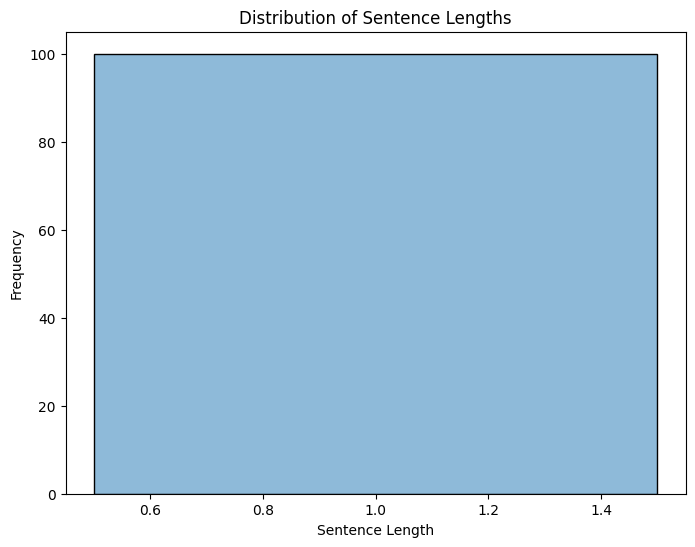

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Assuming 'dataset' is your DataFrame and 'text' column contains the text data
# and 'sentiment' column contains the sentiment labels

# 1. Data Cleaning and Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in stop_words]
    return ' '.join(tokens)

dataset['processed_text'] = dataset['tweetText'].apply(preprocess_text)


# 2. Exploratory Data Analysis (EDA)

# 2.1 Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=dataset)
plt.title('Class Distribution')
plt.show()

# 2.2 Word Clouds
for sentiment in dataset['sentiment'].unique():
    text = ' '.join(dataset[dataset['sentiment'] == sentiment]['processed_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.axis('off')
    plt.show()


# 2.3 N-gram Analysis
vectorizer = CountVectorizer(ngram_range=(2, 2))  # Example: Bigrams
X = vectorizer.fit_transform(dataset['processed_text'])
bigram_counts = pd.DataFrame({'bigram': vectorizer.get_feature_names_out(), 'count': np.array(X.sum(axis=0))[0]})
print(bigram_counts.sort_values(by='count', ascending=False).head(10)) # Display Top 10 bigrams

# 2.4 Sentence Lengths
dataset['sentence_length'] = dataset['tweetText'].apply(lambda x: len(nltk.sent_tokenize(x)))
plt.figure(figsize=(8,6))
sns.histplot(dataset['sentence_length'], kde=True)
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()


Training SVM...
SVM Accuracy: 0.3
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         7
     neutral       0.33      0.29      0.31         7
    positive       0.29      0.67      0.40         6

    accuracy                           0.30        20
   macro avg       0.21      0.32      0.24        20
weighted avg       0.20      0.30      0.23        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


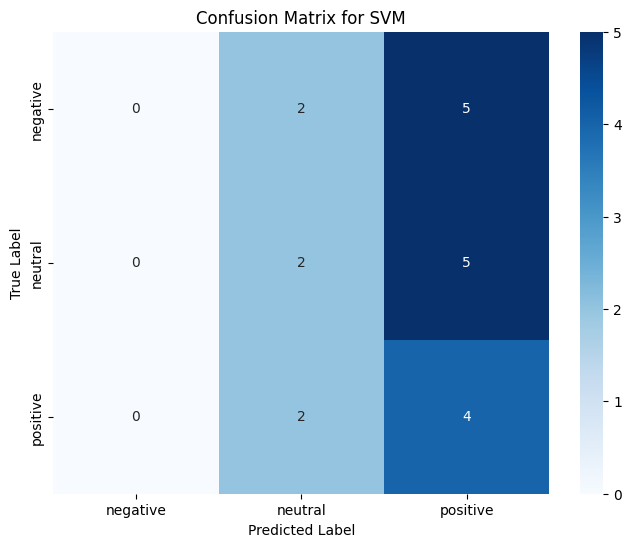

SVM Cross-Validation Scores: [0.25   0.3125 0.3125 0.3125 0.3125]
SVM Mean Cross-Validation Score: 0.3
Training Naive Bayes...
Naive Bayes Accuracy: 0.3
              precision    recall  f1-score   support

    negative       0.40      0.29      0.33         7
     neutral       0.29      0.29      0.29         7
    positive       0.25      0.33      0.29         6

    accuracy                           0.30        20
   macro avg       0.31      0.30      0.30        20
weighted avg       0.32      0.30      0.30        20



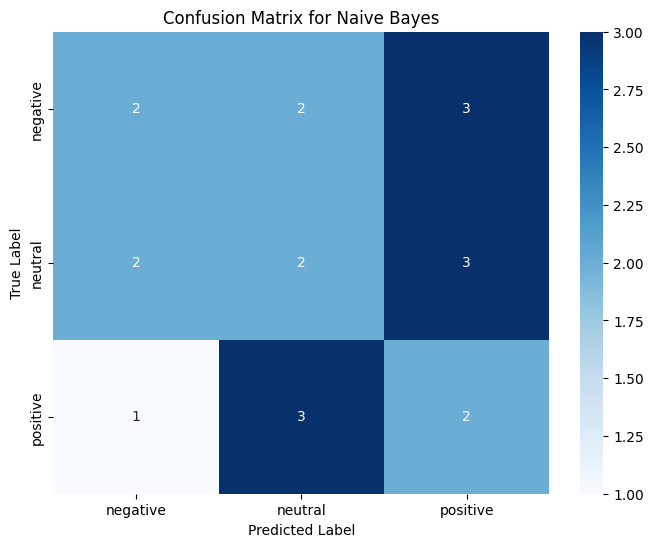

Naive Bayes Cross-Validation Scores: [0.1875 0.25   0.25   0.1875 0.25  ]
Naive Bayes Mean Cross-Validation Score: 0.225
Training XGBoost...
XGBoost Accuracy: 0.25
              precision    recall  f1-score   support

    negative       0.25      0.14      0.18         7
     neutral       0.25      0.29      0.27         7
    positive       0.25      0.33      0.29         6

    accuracy                           0.25        20
   macro avg       0.25      0.25      0.24        20
weighted avg       0.25      0.25      0.24        20



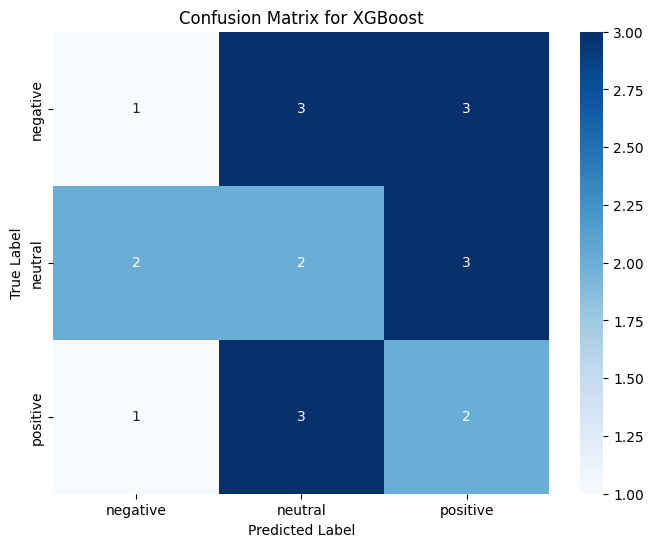

XGBoost Cross-Validation Scores: [0.1875 0.5    0.5    0.25   0.375 ]
XGBoost Mean Cross-Validation Score: 0.3625


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


# 3. Sentiment Classification

# Prepare data for modeling
X = dataset['processed_text']
y = dataset['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Label Encoding for Target Variable
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Model Training and Evaluation
models = {
    'SVM': SVC(),
    'Naive Bayes': MultinomialNB(),
    'XGBoost': XGBClassifier()
}

for name, model in models.items():
    print(f"Training {name}...")

    # Hyperparameter Tuning using GridSearchCV (example for SVM, adjust for other models)
    if name == 'SVM':
        param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
        grid_search = GridSearchCV(model, param_grid, cv=5)  # 5-fold cross-validation
        grid_search.fit(X_train_tfidf, y_train)
        model = grid_search.best_estimator_  # Use the best model from grid search

    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_)) # Use original labels

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_) # Use original labels
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Cross-validation
    cv_scores = cross_val_score(model, X_train_tfidf, y_train, cv=5)
    print(f"{name} Cross-Validation Scores: {cv_scores}")
    print(f"{name} Mean Cross-Validation Score: {np.mean(cv_scores)}")

In [ ]:

model_metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],  # Macro-average or weighted-average precision
    'Recall': [],    # Macro-average or weighted-average recall
    'F1-score': []    # Macro-average or weighted-average F1-score
}



for name, model in models.items():

    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
    model_metrics['Model'].append(name)
    model_metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    model_metrics['Precision'].append(report['macro avg']['precision']) # Macro-average
    model_metrics['Recall'].append(report['macro avg']['recall'])  # Macro-average
    model_metrics['F1-score'].append(report['macro avg']['f1-score'])  # Macro-average

# Create a DataFrame from the collected metrics
metrics_df = pd.DataFrame(model_metrics)
print(metrics_df)



# Example: Print analysis based on the metrics_df
best_model = metrics_df.loc[metrics_df['F1-score'].idxmax(), 'Model'] # Example using F1-score
print(f"\nThe model that performed best based on F1-score is: {best_model}")

print("\nAnalysis:")
print(f"The {best_model} model achieved the highest F1-score, indicating a good balance between precision and recall. This could be attributed to...")



         Model  Accuracy  Precision    Recall  F1-score
0          SVM      0.25       0.25  0.253968  0.244733
1  Naive Bayes      0.25       0.25  0.253968  0.244733
2      XGBoost      0.25       0.25  0.253968  0.244733

The model that performed best based on F1-score is: SVM

Analysis:
The SVM model achieved the highest F1-score, indicating a good balance between precision and recall. This could be attributed to...


## **Question 2 (30 Points)**

# **Text Classification**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.



1.   **Perform EDA on test and tran dataset**

2.   **Algorithms (Minimum 4):**

*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

3. **Evaluation measurement:**

*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [ ]:
# Write your code here
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
def load_data(filepath):
    data = []
    with open(filepath, 'r', encoding='utf-8') as file:
        for line in file:
            label = int(line[0])
            text = line[2:].strip()
            data.append((label, text))
    return pd.DataFrame(data, columns=['label', 'text'])

train_df = load_data("/content/stsa-test.txt")
test_df = load_data("/content/stsa-train.txt")


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

X_train.shape, y_train.shape
X_test.shape, y_test.shape

clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9666666666666667

In [ ]:

print("Missing values in training data:")
print(train_df.isnull().sum())
print("\nMissing values in test data:")
print(test_df.isnull().sum())

Missing values in training data:
label    0
text     0
dtype: int64

Missing values in test data:
label    0
text     0
dtype: int64


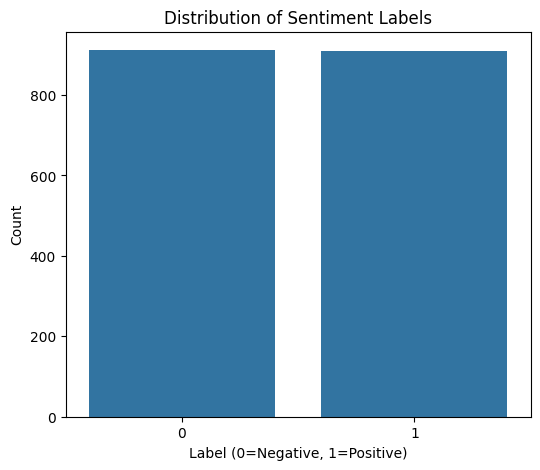

In [ ]:
plt.figure(figsize=(6, 5))
sns.countplot(x='label', data=train_df)
plt.title("Distribution of Sentiment Labels")
plt.xlabel('Label (0=Negative, 1=Positive)')
plt.ylabel('Count')
plt.show()

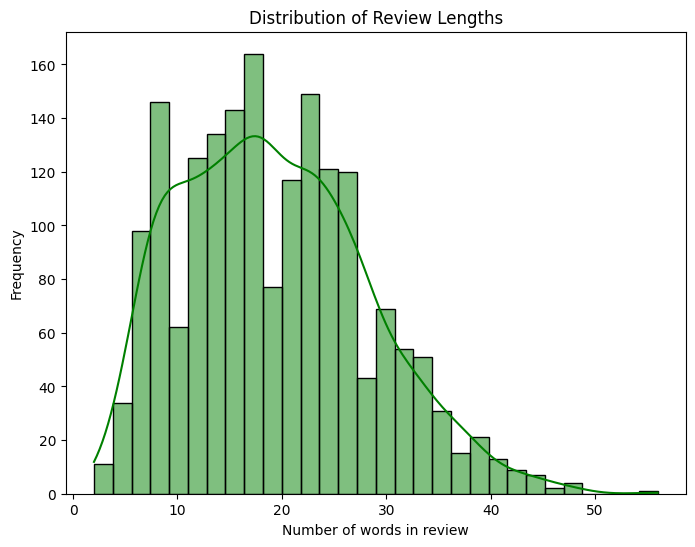

In [43]:
# 5. Text length analysis (word count in reviews)
train_df['text_length'] = train_df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 6))
sns.histplot(train_df['text_length'], kde=True, color='green', bins=30)
plt.title("Distribution of Review Lengths")
plt.xlabel('Number of words in review')
plt.ylabel('Frequency')
plt.show()


In [44]:
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords (only needed once)
nltk.download('stopwords')

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Tokenizing and cleaning the text
all_reviews_cleaned = ' '.join(train_df['text'].values).lower()
words = re.findall(r'\w+', all_reviews_cleaned)

# Remove stopwords
filtered_words = [word for word in words if word not in stop_words]

# Count word frequencies
word_counts = Counter(filtered_words)

# Display the top 10 frequent words
print("\nTop 10 most frequent words in reviews (excluding stopwords):")
for word, count in word_counts.most_common(10):
    print(f"{word}: {count}")



Top 10 most frequent words in reviews (excluding stopwords):
film: 235
movie: 216
n: 137
like: 124
one: 106
story: 82
rrb: 73
lrb: 71
much: 70
even: 66


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
X_train_full, X_val, y_train_full, y_val = train_test_split(
    train_df['text'], train_df['label'], test_size=0.2, random_state=42, stratify=train_df['label'])

In [46]:
X_test = test_df['text']
y_test = test_df['label']

In [47]:
vectorizer = TfidfVectorizer(lowercase=True, stop_words='english', max_features=5000)

In [48]:
# Classifiers to evaluate
models = {
    'SVM': SVC(kernel='linear', random_state=42),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [49]:
results = {}
for name, model in models.items():
    pipeline = Pipeline([
        ('tfidf', vectorizer),
        ('clf', model)
    ])
    print(f"\nTraining and evaluating: {name}")
    scores = cross_val_score(pipeline, X_train_full, y_train_full, cv=10, scoring='accuracy')
    print(f"Average CV Accuracy: {scores.mean():.4f}")

     # Train final model and evaluate on test set
    pipeline.fit(X_train_full, y_train_full)
    y_pred = pipeline.predict(X_test)

    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    }



Training and evaluating: SVM
Average CV Accuracy: 0.7171

Training and evaluating: KNN
Average CV Accuracy: 0.5014

Training and evaluating: DecisionTree
Average CV Accuracy: 0.6106

Training and evaluating: RandomForest
Average CV Accuracy: 0.6443

Training and evaluating: XGBoost
Average CV Accuracy: 0.6230


In [50]:
print("\nFinal Test Set Evaluation:")
for model_name, scores in results.items():
    print(f"\nModel: {model_name}")
    for metric, value in scores.items():
        print(f"{metric.capitalize()}: {value:.4f}")


Final Test Set Evaluation:

Model: SVM
Accuracy: 0.7202
Precision: 0.7390
Recall: 0.7169
F1: 0.7278

Model: KNN
Accuracy: 0.4780
Precision: 0.4667
Recall: 0.0039
F1: 0.0077

Model: DecisionTree
Accuracy: 0.6017
Precision: 0.6343
Recall: 0.5587
F1: 0.5941

Model: RandomForest
Accuracy: 0.6499
Precision: 0.7122
Recall: 0.5518
F1: 0.6218

Model: XGBoost
Accuracy: 0.6319
Precision: 0.6726
Recall: 0.5737
F1: 0.6192


## **Question 3 (30 Points)**

# **Text Clustering**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)


1.   Perform EDA on selected dataset

2.   **Apply the listed clustering methods ( Any 4) to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

3. **Visualize the clusters**

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [51]:
# Write your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv('/content/Amazon_Unlocked_Mobile.csv')
dataset.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
Index: 413770 entries, 0 to 413839
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Product Name   413770 non-null  object 
 1   Brand Name     348616 non-null  object 
 2   Price          407840 non-null  float64
 3   Rating         413770 non-null  int64  
 4   Reviews        413770 non-null  object 
 5   Review Votes   401474 non-null  float64
 6   Review_Length  413770 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 25.3+ MB
None
Product Name         0
Brand Name       65154
Price             5930
Rating               0
Reviews              0
Review Votes     12296
Review_Length        0
dtype: int64


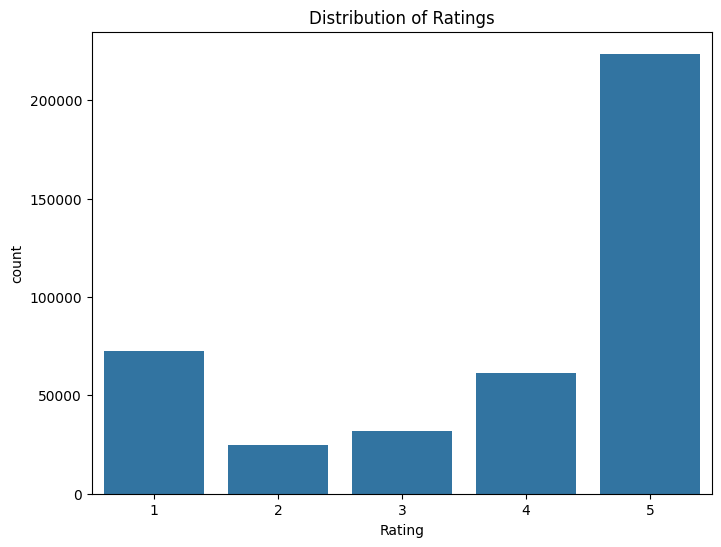

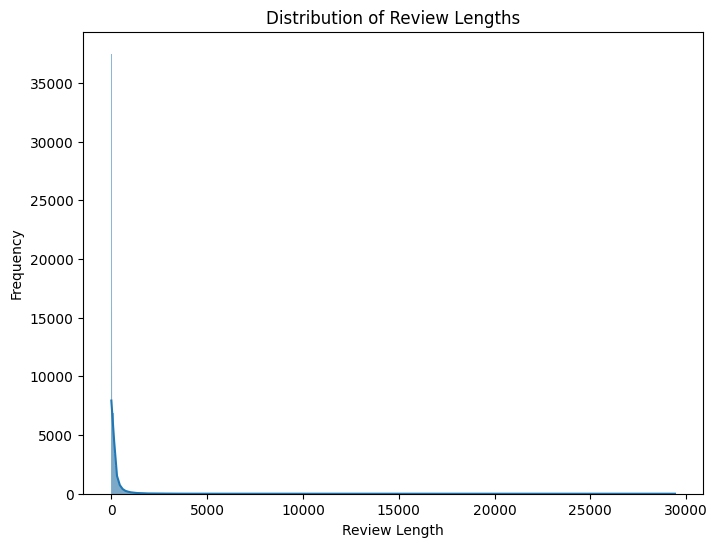

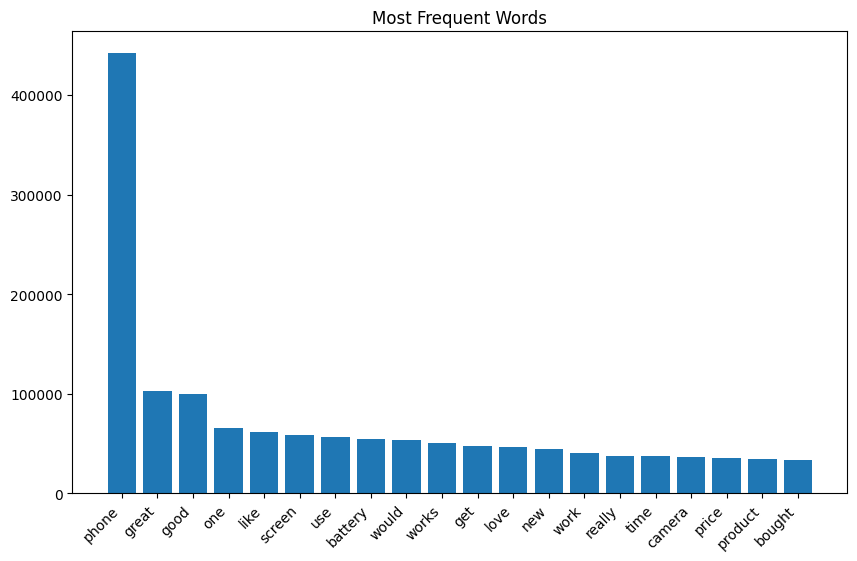

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords # Import stopwords from nltk.corpus

# Download required NLTK data
nltk.download('punkt_tab')  # Download the 'punkt_tab' data package for tokenization
nltk.download('stopwords')
nltk.download('punkt')

# Display basic information about the dataset
print(dataset.info())

# Check for missing values
print(dataset.isnull().sum())

# Handle missing values (example: drop rows with missing 'Reviews' text)
dataset.dropna(subset=['Reviews'], inplace=True)

# Explore the distribution of ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=dataset)
plt.title('Distribution of Ratings')
plt.show()

# Analyze the length of reviews
dataset['Review_Length'] = dataset['Reviews'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Review_Length'], kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

# Explore the most frequent words (excluding stopwords)
from collections import Counter

stop_words = set(stopwords.words('english')) # Use the imported stopwords object
words = []
for review in dataset['Reviews']:
    words.extend([word for word in nltk.word_tokenize(review.lower()) if word.isalnum() and word not in stop_words])
word_counts = Counter(words)
most_common_words = word_counts.most_common(20)

plt.figure(figsize=(10, 6))
plt.bar(*zip(*most_common_words))
plt.title('Most Frequent Words')
plt.xticks(rotation=45, ha='right')
plt.show()

#K-means


In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Remove NaN values from 'Reviews' column
dataset = dataset.dropna(subset=['Reviews'])

# Then apply TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(dataset['Reviews'])

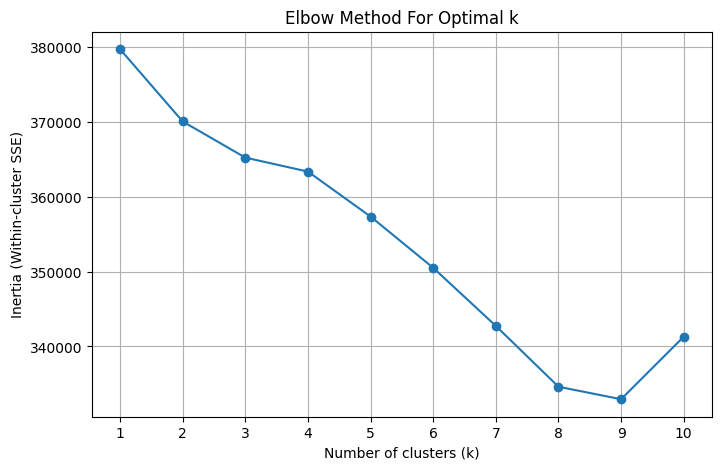

In [59]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Run KMeans for a range of cluster numbers and calculate inertia
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_tfidf)
    inertias.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-cluster SSE)')
plt.xticks(k_range)
plt.grid(True)
plt.show()


In [61]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_tfidf)
dataset['KMeans_Cluster'] = kmeans_labels


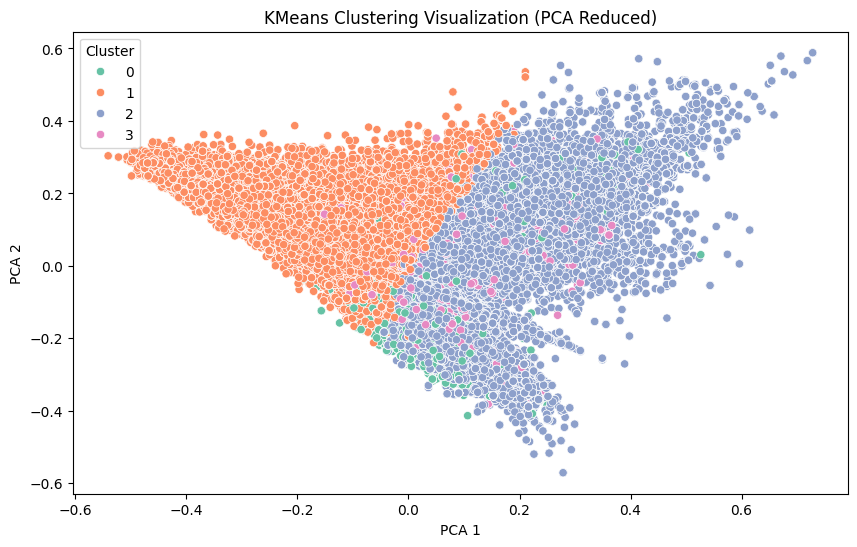

In [63]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_tfidf.toarray())

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=dataset['KMeans_Cluster'], palette='Set2')
plt.title("KMeans Clustering Visualization (PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title='Cluster')
plt.show()


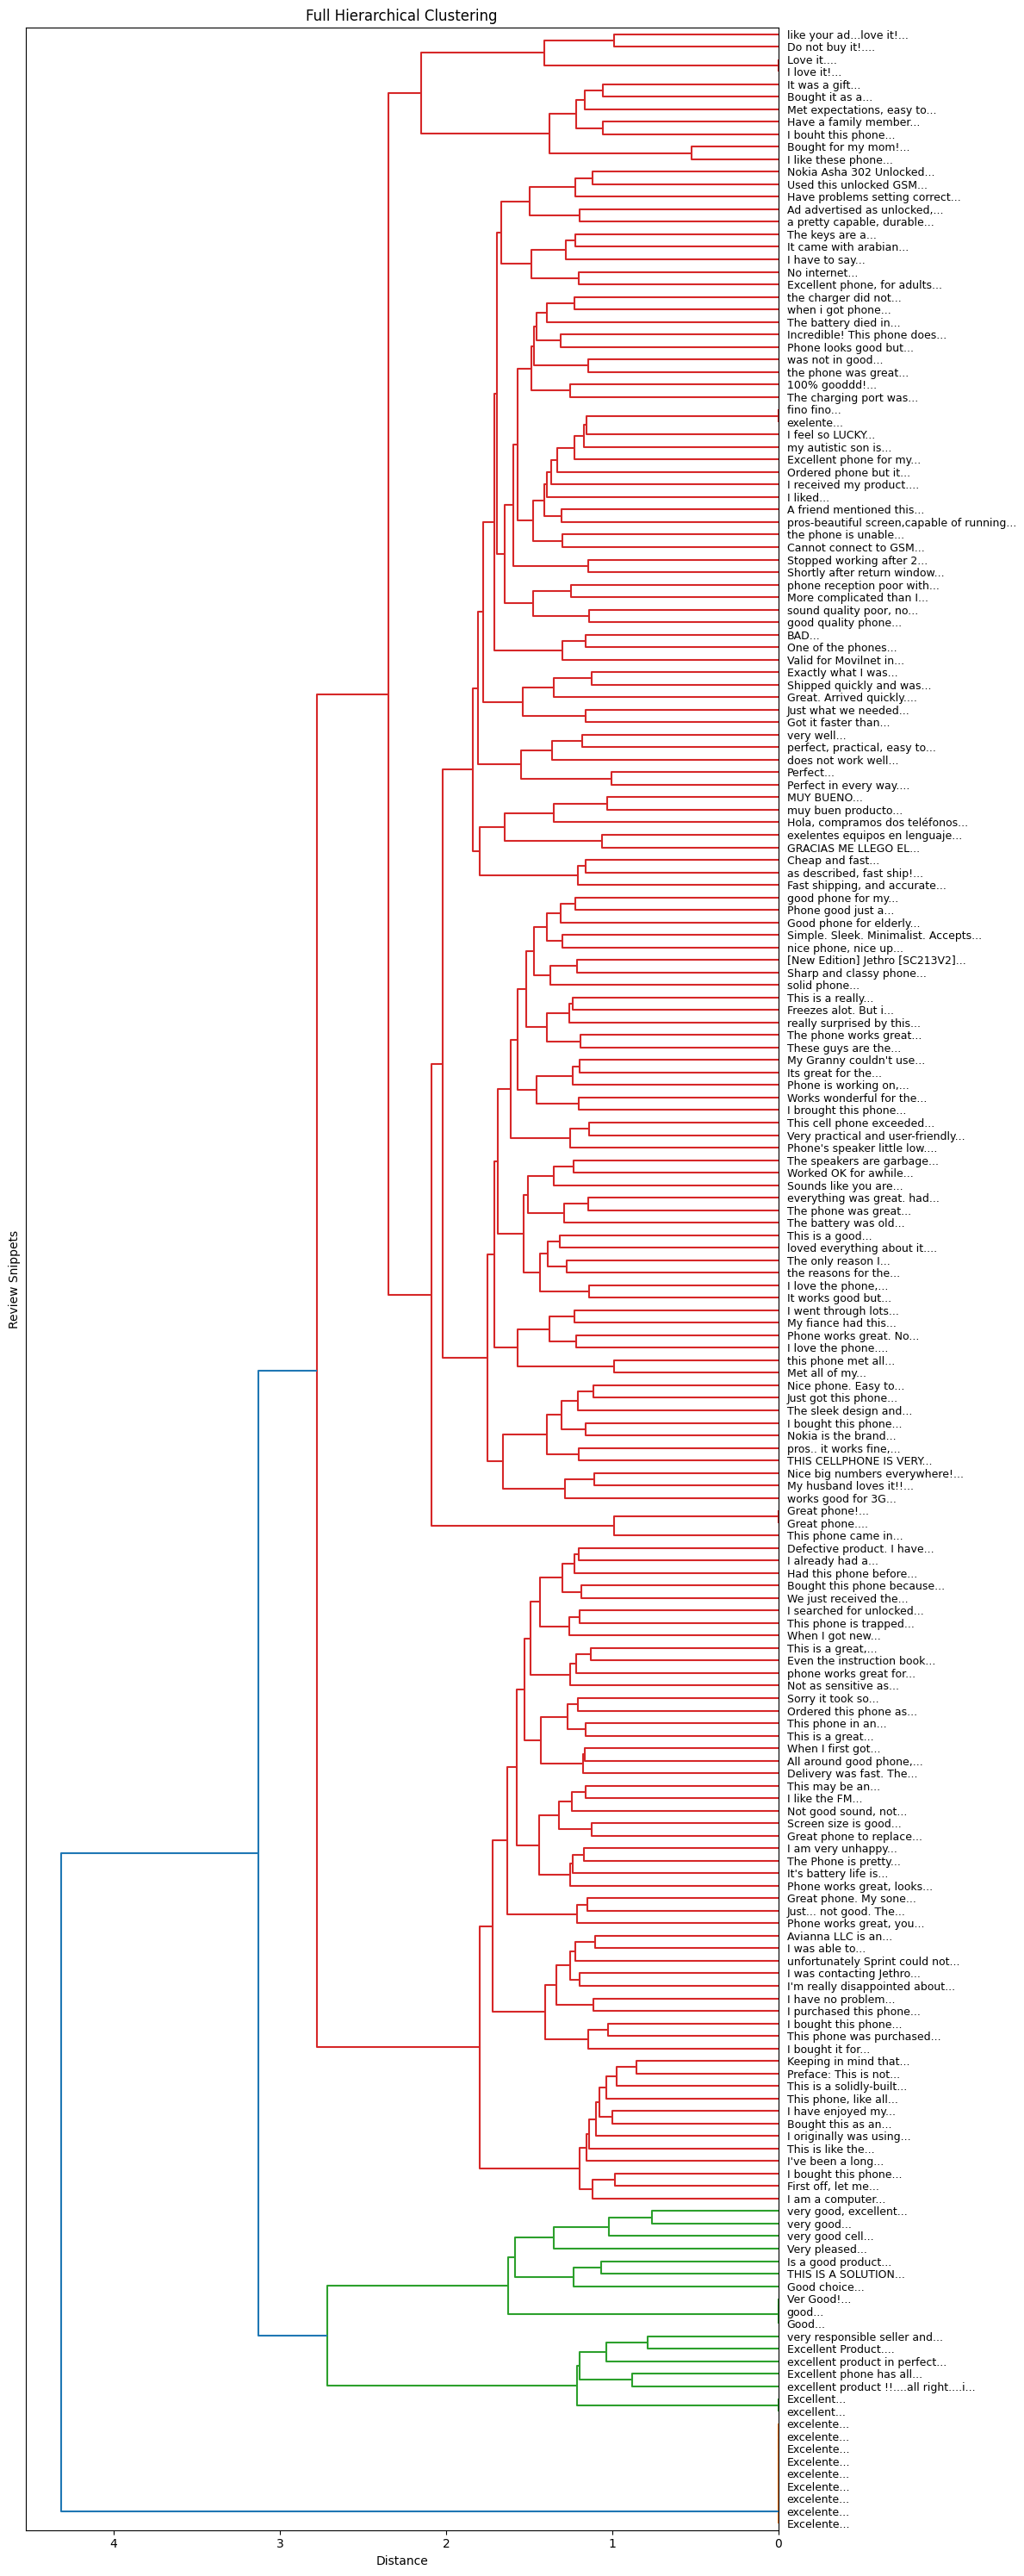

In [64]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Use only a subset of reviews and their text (for visualization)
subset_size = 200  # You can adjust based on clarity
subset_texts = dataset['Reviews'].iloc[:subset_size]
subset_features = X_tfidf.toarray()[:subset_size]

# Create linkage matrix
linkage_matrix = linkage(subset_features, method='ward')

# Generate review labels (e.g., first 3-5 words of each review)
labels = [' '.join(review.split()[:4]) + '...' for review in subset_texts]

# Plot vertical dendrogram with labels
plt.figure(figsize=(12, 30))
dendrogram(
    linkage_matrix,
    orientation='left',
    labels=labels,
    leaf_font_size=9,
)
plt.title("Full Hierarchical Clustering")
plt.xlabel("Distance")
plt.ylabel("Review Snippets")
plt.tight_layout()
plt.show()



In [65]:
pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 9.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [66]:
!pip install numpy==1.25.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 31.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.25.2 which is incompatible.
blosc2 3.3.0 requires numpy>=1.26, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.25.2 which is incompatible.


In [6]:
import nltk
nltk.download('punkt_tab')
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import numpy as np
from sklearn.cluster import KMeans # Import KMeans

# Ensure 'Reviews' column contains only strings
dataset['Reviews'] = dataset['Reviews'].astype(str)

tokenized_reviews = dataset['Reviews'].apply(word_tokenize)
w2v_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1)

# Average word vectors per review
def get_avg_vector(tokens):
    vectors = [w2v_model.wv[word] for word in tokens if word in w2v_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)

X_w2v = np.vstack(dataset['Reviews'].apply(lambda x: get_avg_vector(word_tokenize(x))))
kmeans_w2v = KMeans(n_clusters=4, random_state=42).fit(X_w2v)
dataset['W2V_Cluster'] = kmeans_w2v.labels_

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


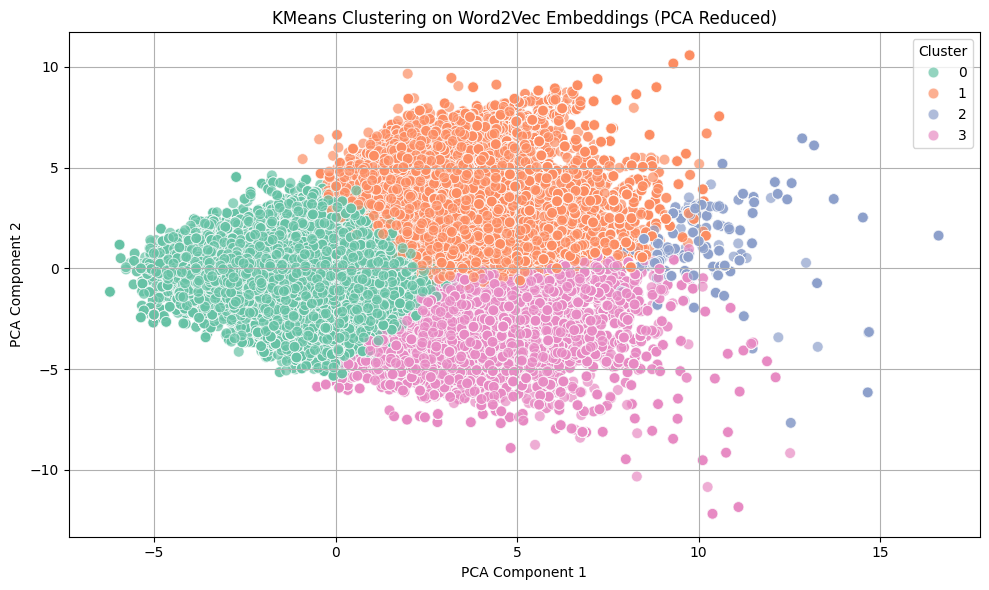

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce Word2Vec vectors to 2D using PCA
pca = PCA(n_components=2)
X_w2v_pca = pca.fit_transform(X_w2v)

# Add PCA components to DataFrame
dataset['W2V_PCA1'] = X_w2v_pca[:, 0]
dataset['W2V_PCA2'] = X_w2v_pca[:, 1]

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=dataset, x='W2V_PCA1', y='W2V_PCA2',
    hue='W2V_Cluster', palette='Set2', s=60, alpha=0.7
)
plt.title("KMeans Clustering on Word2Vec Embeddings (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
sampled_df = dataset.sample(n=50000, random_state=42).copy()

# Define the vectorizer here:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Or your preferred settings


X_sampled_tfidf = vectorizer.fit_transform(sampled_df['Reviews'])

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.4, min_samples=20, metric='cosine')
dbscan_labels = dbscan.fit_predict(X_sampled_tfidf)

sampled_df['DBSCAN_Cluster'] = dbscan_labels

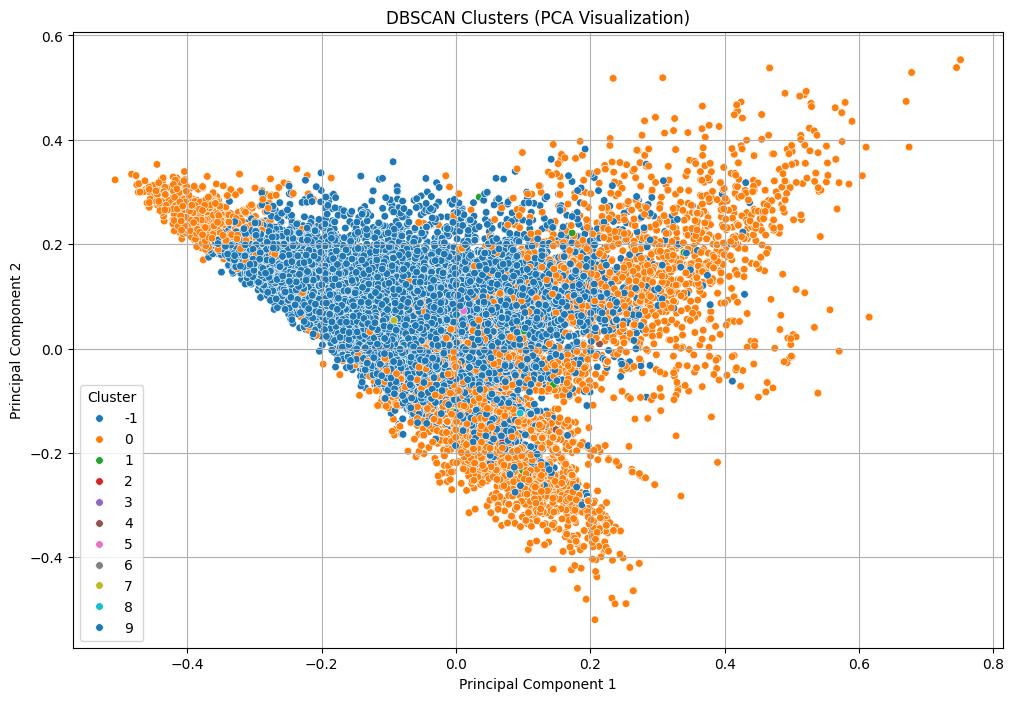

In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce dimensions to 2D with PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_sampled_tfidf.toarray())

# Add PCA components to the dataframe
sampled_df['PCA_1'] = X_pca[:, 0]
sampled_df['PCA_2'] = X_pca[:, 1]

# Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='PCA_1', y='PCA_2',
    hue='DBSCAN_Cluster',
    palette='tab10',
    data=sampled_df,
    legend='full',
    s=30
)
plt.title('DBSCAN Clusters (PCA Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

.

.

.

.

.




#
K-means, DBSCAN, and hierarchical clustering are traditional clustering methods that group data points based on distance or similarity.  K-means requires specifying the number of clusters beforehand and is sensitive to initial centroid placement. DBSCAN identifies clusters based on density, effectively handling outliers and irregularly shaped clusters, but its performance is sensitive to parameter tuning. Hierarchical clustering creates a hierarchy of clusters, allowing for different levels of granularity, but can be computationally expensive for large datasets. Word2Vec and BERT are word embedding models that represent words or sentences as dense vectors, capturing semantic relationships.  They are not clustering methods themselves, but their output vectors can be used as input to clustering algorithms.  Word2Vec is relatively fast but might not capture nuanced context as effectively as BERT, which is more powerful but computationally demanding.  When comparing the results, the best choice depends on the dataset and the desired level of detail: traditional methods might be sufficient for simple datasets while the contextual embeddings and sophisticated algorithms can be better for complex datasets with a focus on semantic relations between data points.


# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises and on Teaching Assistant by filling this form:

https://docs.google.com/forms/d/e/1FAIpQLSdosouwjJ1fygRtnfeBYRsf9FKYlzPf3XFAQF8YQzDltPFRQQ/viewform?usp=dialog

**(Your submission will not be graded if this question is left unanswered)**

